In [1]:
# General Dependencies
import timeit, os
import numpy as np
import scipy.io as io

# Preprocessing Dependencies
from trefide.utils import psd_noise_estimate

# PMD Model Dependencies
from trefide.pmd import batch_decompose, batch_recompose, overlapping_batch_decompose, overlapping_batch_recompose

# Plot & Video Dependencies
import matplotlib.pyplot as plt
from trefide.plot import pixelwise_ranks
from trefide.extras.util_plot import comparison_plot, correlation_traces, snr_per_frame, nearest_frame_corr
from trefide.video import write_mpl, play_cv2

# Set Data Information
dataset = "Q-State Bio"
filename = os.path.join("..", "data", "prepared_sampleMovie.npy")

%load_ext autoreload
%autoreload 2

from trefide.decimation import downsample_image, downsample_signal, upsample_image, upsample_signal

In [2]:
mov = np.load(filename)
fov_height, fov_width, num_frames = mov.shape

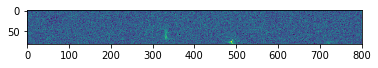

In [3]:
plt.imshow(mov[:,:,500])
plt.show()

In [4]:
im_ds = downsample_image(fov_height, fov_width, 2,
                         mov[:, :, 500].reshape(fov_height*fov_width, order='F').copy())

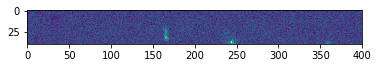

In [5]:
plt.imshow(im_ds)
plt.show()

In [25]:
im_us = upsample_image(fov_height, fov_width, 2,
                       np.reshape(im_ds, (int(fov_height*fov_width/4),), order='F').copy())

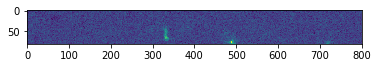

In [26]:
plt.imshow(im_us)
plt.show()

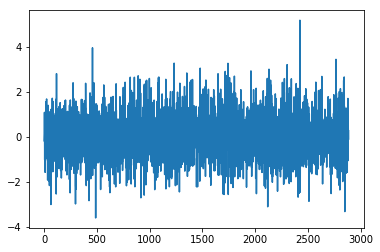

In [6]:
plt.plot(np.arange(num_frames), mov[-5,-10,:])
plt.show()

In [15]:
num_frames/6

481.0

In [16]:
signal_ds = downsample_signal(num_frames, 6, mov[-5,-10,:] )

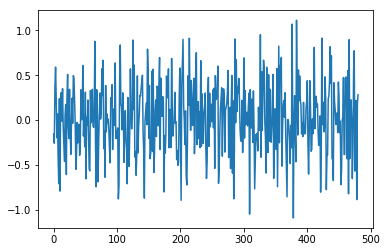

In [17]:
plt.plot(np.arange(num_frames/6), signal_ds)
plt.show()

In [18]:
signal_us = upsample_signal(num_frames, 6, signal_ds)

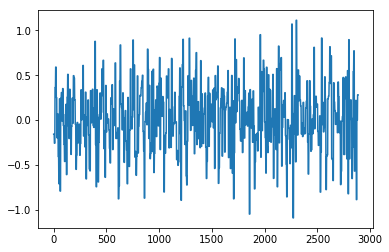

In [19]:
plt.plot(np.arange(num_frames), signal_us)
plt.show()